# Kaggle 신용카드 부정결제 검출 
https://www.kaggle.com/mlg-ulb/creditcardfraud
## Credit Card Fraud Detection
* creditcard.csv (284,807 * 31)
* Class : <font color = 'blue'>'0' (정상결제)</font>, <font color = 'red'>'1' (부정결제)</font>
* 부정 검출(Fraud Detection), 이상 탐지(Anomaly Detection)

In [1]:
import warnings
warnings.filterwarnings('ignore')

# I. wget From Github
* 'creditCardFraud.zip' 파일 다운로드

In [2]:
!wget https://raw.githubusercontent.com/rusita-ai/pyData/master/creditCardFraud.zip

--2023-03-22 07:08:12--  https://raw.githubusercontent.com/rusita-ai/pyData/master/creditCardFraud.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69155672 (66M) [application/zip]
Saving to: ‘creditCardFraud.zip’

creditCardFraud.zip 100%[===================>]  65.95M   201MB/s    in 0.3s    

2023-03-22 07:08:13 (201 MB/s) - ‘creditCardFraud.zip’ saved [69155672/69155672]



* 다운로드 결과 확인

In [3]:
!ls -l 

total 67540
-rw-r--r-- 1 root root 69155672 Mar 22 07:08 creditCardFraud.zip
drwxr-xr-x 1 root root     4096 Mar 20 13:36 sample_data


# II. Data Preprocessing

> ## 1) Unzip 'creditCardFraud.zip'

* Colab 파일시스템에 'creditcard.csv' 파일 생성

In [4]:
!unzip creditCardFraud.zip

Archive:  creditCardFraud.zip
  inflating: creditcard.csv          


* creditcard.csv 파일 확인

In [5]:
!ls -l

total 214836
-rw-r--r-- 1 root root 150828752 Sep 20  2019 creditcard.csv
-rw-r--r-- 1 root root  69155672 Mar 22 07:08 creditCardFraud.zip
drwxr-xr-x 1 root root      4096 Mar 20 13:36 sample_data


> ## 2) 데이터 읽어오기

* pandas DataFrame

In [6]:
%%time

import pandas as pd

DF = pd.read_csv('creditcard.csv')

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
DF.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


* '0' (정상) Class와 '1' (부정) Class 개수

In [8]:
DF.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

* '0' (정상) Class와 '1' (부정) Class 비율

In [9]:
DF.Class.value_counts(normalize = True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

> ## 3) Time 열(Column) 삭제

In [10]:
DF.drop('Time', axis = 1, inplace = True)

DF.head(1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0


# III. train_test_split( )

* X (Input), y (Output) 지정
 - 7: 3
 - random_state = 2045

In [11]:
X = DF.iloc[:,:-1]
y = DF.iloc[:, -1]

X.shape, y.shape

((284807, 29), (284807,))

## Visualization

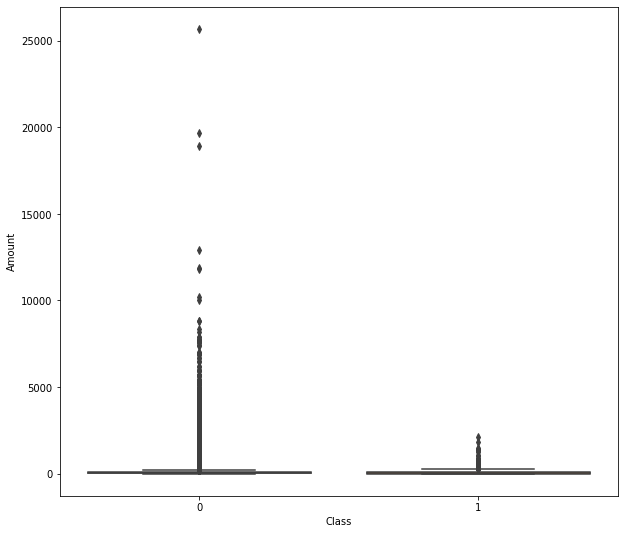

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10, 9))
sns.boxplot(data = DF,
            x = 'Class',
            y = 'Amount')
plt.show()

# ?!?! 이상치 엄청나네...ㄷㄷ

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data : ',X_train.shape, y_train.shape)
print('Test Data  : ',X_test.shape, y_test.shape)

Train Data :  (199364, 29) (199364,)
Test Data  :  (85443, 29) (85443,)


# IV. Modeling - Logistic Regression

### 1) 모델 생성

In [16]:
from sklearn.linear_model import LogisticRegression

Model_lr = LogisticRegression()
Model_lr.fit(X_train, y_train)

LogisticRegression()

### 2) 예측값 생성

In [17]:
y_hat_lr = Model_lr.predict(X_test)
y_hat_lr

array([0, 0, 0, ..., 0, 0, 0])

### 3) Confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_hat_lr, y_test)

array([[85288,    62],
       [   11,    82]])

### 4) Classification Report

In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat_lr,
                            target_names = ['0','1'],
                            digits = 5))

              precision    recall  f1-score   support

           0    0.99927   0.99987   0.99957     85299
           1    0.88172   0.56944   0.69198       144

    accuracy                        0.99915     85443
   macro avg    0.94050   0.78466   0.84578     85443
weighted avg    0.99908   0.99915   0.99905     85443



# V. Modeling - Decison Tree

### 1) 모델 생성

In [21]:
from sklearn.tree import DecisionTreeClassifier

Model_dt = DecisionTreeClassifier(random_state = 2045)
Model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2045)

### 2) 예측값 생성

In [24]:
y_hat_dt = Model_dt.predict(X_test)
y_hat_dt

array([0, 0, 0, ..., 0, 0, 0])

### 3) Confusion Matrix

In [26]:
confusion_matrix(y_test, y_hat_dt)

array([[85268,    31],
       [   34,   110]])

### 4) classification_report

In [27]:
print(classification_report(y_test, y_hat_dt,
                            target_names = ['0', '1'],
                            digits = 5))

              precision    recall  f1-score   support

           0    0.99960   0.99964   0.99962     85299
           1    0.78014   0.76389   0.77193       144

    accuracy                        0.99924     85443
   macro avg    0.88987   0.88176   0.88577     85443
weighted avg    0.99923   0.99924   0.99924     85443



## 1) Model Pruning 해보기

In [28]:
Model_dt1 = DecisionTreeClassifier(max_depth = 3,
                                   random_state = 2045)

Model_dt1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=2045)

In [29]:
y_hat_dt1 = Model_dt1.predict(X_test)
print(confusion_matrix(y_test, y_hat_dt1))

[[85280    19]
 [   40   104]]


In [30]:
print(classification_report(y_test, y_hat_dt1,
                            target_names = ['0', '1'],
                            digits = 5))

              precision    recall  f1-score   support

           0    0.99953   0.99978   0.99965     85299
           1    0.84553   0.72222   0.77903       144

    accuracy                        0.99931     85443
   macro avg    0.92253   0.86100   0.88934     85443
weighted avg    0.99927   0.99931   0.99928     85443



In [31]:
Model_dt2 = DecisionTreeClassifier(max_depth = 5,
                                   random_state = 2045)

Model_dt2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=2045)

In [32]:
y_hat_dt2 = Model_dt1.predict(X_test)
print(confusion_matrix(y_test, y_hat_dt2))

[[85280    19]
 [   40   104]]


In [33]:
print(classification_report(y_test, y_hat_dt2,
                            target_names = ['0', '1'],
                            digits = 5))

              precision    recall  f1-score   support

           0    0.99953   0.99978   0.99965     85299
           1    0.84553   0.72222   0.77903       144

    accuracy                        0.99931     85443
   macro avg    0.92253   0.86100   0.88934     85443
weighted avg    0.99927   0.99931   0.99928     85443



# VI. Modeling - RandomForest (Ensemble)

### 1) 모델생성

In [43]:
from sklearn.ensemble import RandomForestClassifier

Model_rf = RandomForestClassifier(n_estimators = 10,
                                  max_features = 2,
                                  random_state = 2045,
                                  n_jobs = -1)
Model_rf.fit(X_train, y_train)

RandomForestClassifier(max_features=2, n_estimators=10, n_jobs=-1,
                       random_state=2045)

### 2) 예측값 생성

In [45]:
y_hat_rf = Model_rf.predict(X_test)
y_hat_rf

array([0, 0, 0, ..., 0, 0, 0])

### 3) Confusion Matrix

In [37]:
print(confusion_matrix(y_test, y_hat_rf))

[[85292     7]
 [   47    97]]


In [41]:
print(classification_report(y_test,y_hat_rf,
                            target_names = ['0', '1'],
                            digits = 5))

              precision    recall  f1-score   support

           0    0.99945   0.99992   0.99968     85299
           1    0.93269   0.67361   0.78226       144

    accuracy                        0.99937     85443
   macro avg    0.96607   0.83676   0.89097     85443
weighted avg    0.99934   0.99937   0.99932     85443



### 4) 파라메타 수정 확인

In [46]:
Model_rf1 = RandomForestClassifier(n_estimators = 100,
                                  max_features = 4,
                                  random_state = 2045,
                                  n_jobs = -1)
Model_rf1.fit(X_train, y_train)

RandomForestClassifier(max_features=4, n_jobs=-1, random_state=2045)

In [47]:
y_hat_rf1 = Model_rf.predict(X_test)
y_hat_rf1

array([0, 0, 0, ..., 0, 0, 0])

In [48]:
print(confusion_matrix(y_test, y_hat_rf1))

[[85292     7]
 [   47    97]]


In [49]:
print(classification_report(y_test,y_hat_rf1,
                            target_names = ['0', '1'],
                            digits = 5))

              precision    recall  f1-score   support

           0    0.99945   0.99992   0.99968     85299
           1    0.93269   0.67361   0.78226       144

    accuracy                        0.99937     85443
   macro avg    0.96607   0.83676   0.89097     85443
weighted avg    0.99934   0.99937   0.99932     85443



## Logistic Regression 값

In [52]:
print(confusion_matrix(y_hat_lr, y_test))
print(classification_report(y_test, y_hat_lr,
                            target_names = ['0','1'],
                            digits = 5))

[[85288    62]
 [   11    82]]
              precision    recall  f1-score   support

           0    0.99927   0.99987   0.99957     85299
           1    0.88172   0.56944   0.69198       144

    accuracy                        0.99915     85443
   macro avg    0.94050   0.78466   0.84578     85443
weighted avg    0.99908   0.99915   0.99905     85443



## Decision Tree 값

In [53]:
print(confusion_matrix(y_test, y_hat_dt))
print(classification_report(y_test, y_hat_dt,
                            target_names = ['0', '1'],
                            digits = 5))

[[85268    31]
 [   34   110]]
              precision    recall  f1-score   support

           0    0.99960   0.99964   0.99962     85299
           1    0.78014   0.76389   0.77193       144

    accuracy                        0.99924     85443
   macro avg    0.88987   0.88176   0.88577     85443
weighted avg    0.99923   0.99924   0.99924     85443



## Decision Tree 값 Pruning

In [54]:
print(confusion_matrix(y_test, y_hat_dt1))
print(classification_report(y_test, y_hat_dt1,
                            target_names = ['0', '1'],
                            digits = 5))

[[85280    19]
 [   40   104]]
              precision    recall  f1-score   support

           0    0.99953   0.99978   0.99965     85299
           1    0.84553   0.72222   0.77903       144

    accuracy                        0.99931     85443
   macro avg    0.92253   0.86100   0.88934     85443
weighted avg    0.99927   0.99931   0.99928     85443



In [55]:
print(confusion_matrix(y_test, y_hat_dt2))
print(classification_report(y_test, y_hat_dt2,
                            target_names = ['0', '1'],
                            digits = 5))

[[85280    19]
 [   40   104]]
              precision    recall  f1-score   support

           0    0.99953   0.99978   0.99965     85299
           1    0.84553   0.72222   0.77903       144

    accuracy                        0.99931     85443
   macro avg    0.92253   0.86100   0.88934     85443
weighted avg    0.99927   0.99931   0.99928     85443



## RandomForest 값

In [56]:
print(confusion_matrix(y_test, y_hat_rf))
print(classification_report(y_test,y_hat_rf,
                            target_names = ['0', '1'],
                            digits = 5))

[[85292     7]
 [   47    97]]
              precision    recall  f1-score   support

           0    0.99945   0.99992   0.99968     85299
           1    0.93269   0.67361   0.78226       144

    accuracy                        0.99937     85443
   macro avg    0.96607   0.83676   0.89097     85443
weighted avg    0.99934   0.99937   0.99932     85443



## RandomForest 값 파라메타 수정

In [57]:
print(confusion_matrix(y_test, y_hat_rf1))
print(classification_report(y_test,y_hat_rf1,
                            target_names = ['0', '1'],
                            digits = 5))

[[85292     7]
 [   47    97]]
              precision    recall  f1-score   support

           0    0.99945   0.99992   0.99968     85299
           1    0.93269   0.67361   0.78226       144

    accuracy                        0.99937     85443
   macro avg    0.96607   0.83676   0.89097     85443
weighted avg    0.99934   0.99937   0.99932     85443



# 
# 
# 
# The End
# 
# 
# 